<a href="https://colab.research.google.com/github/andrea212023/ML-Kis/blob/main/HW_Clustering_KIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [245]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/marketing_campaign.csv", sep='\t')

In [246]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [247]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [248]:
# Display descriptive statistics for numerical features
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [249]:
# Check for missing values in each column
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


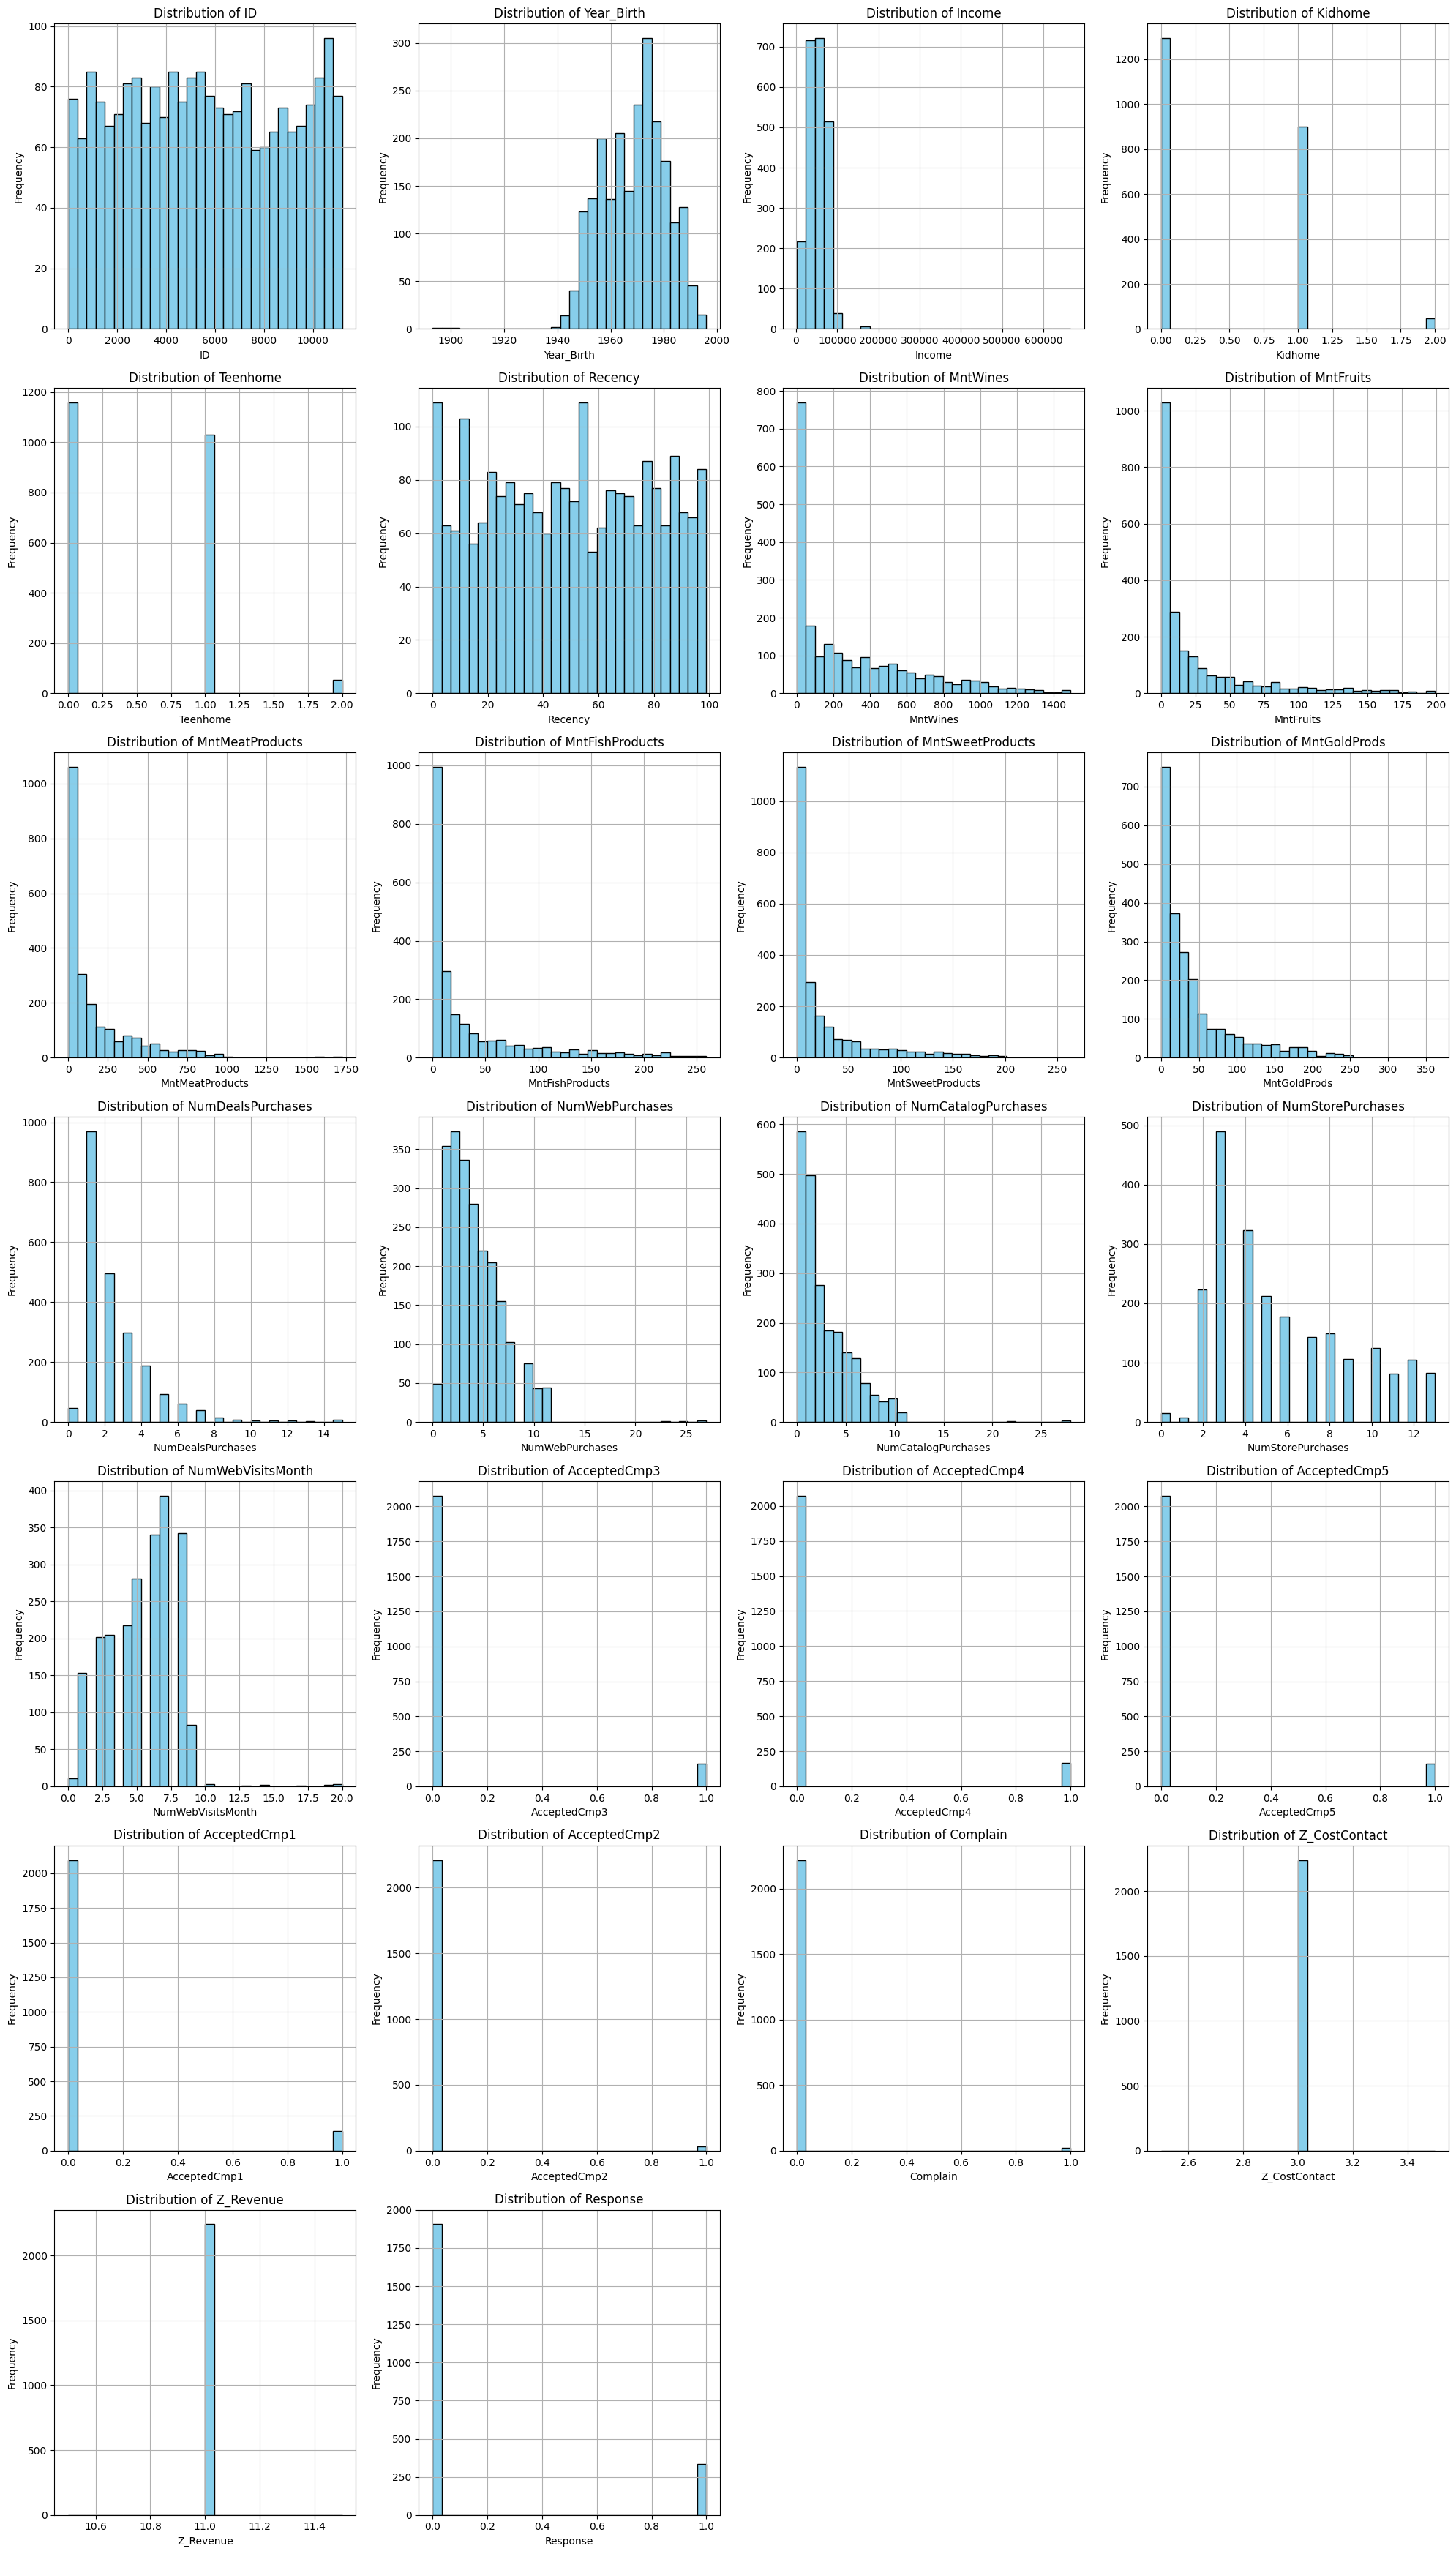

In [250]:
import math

# Select numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Define the layout dynamically
ncols = 4  # Number of columns for the grid
nrows = math.ceil(len(numerical_features) / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for each numerical feature
for i, column in enumerate(numerical_features):
    ax = axes[i]
    df[column].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Hide unused subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



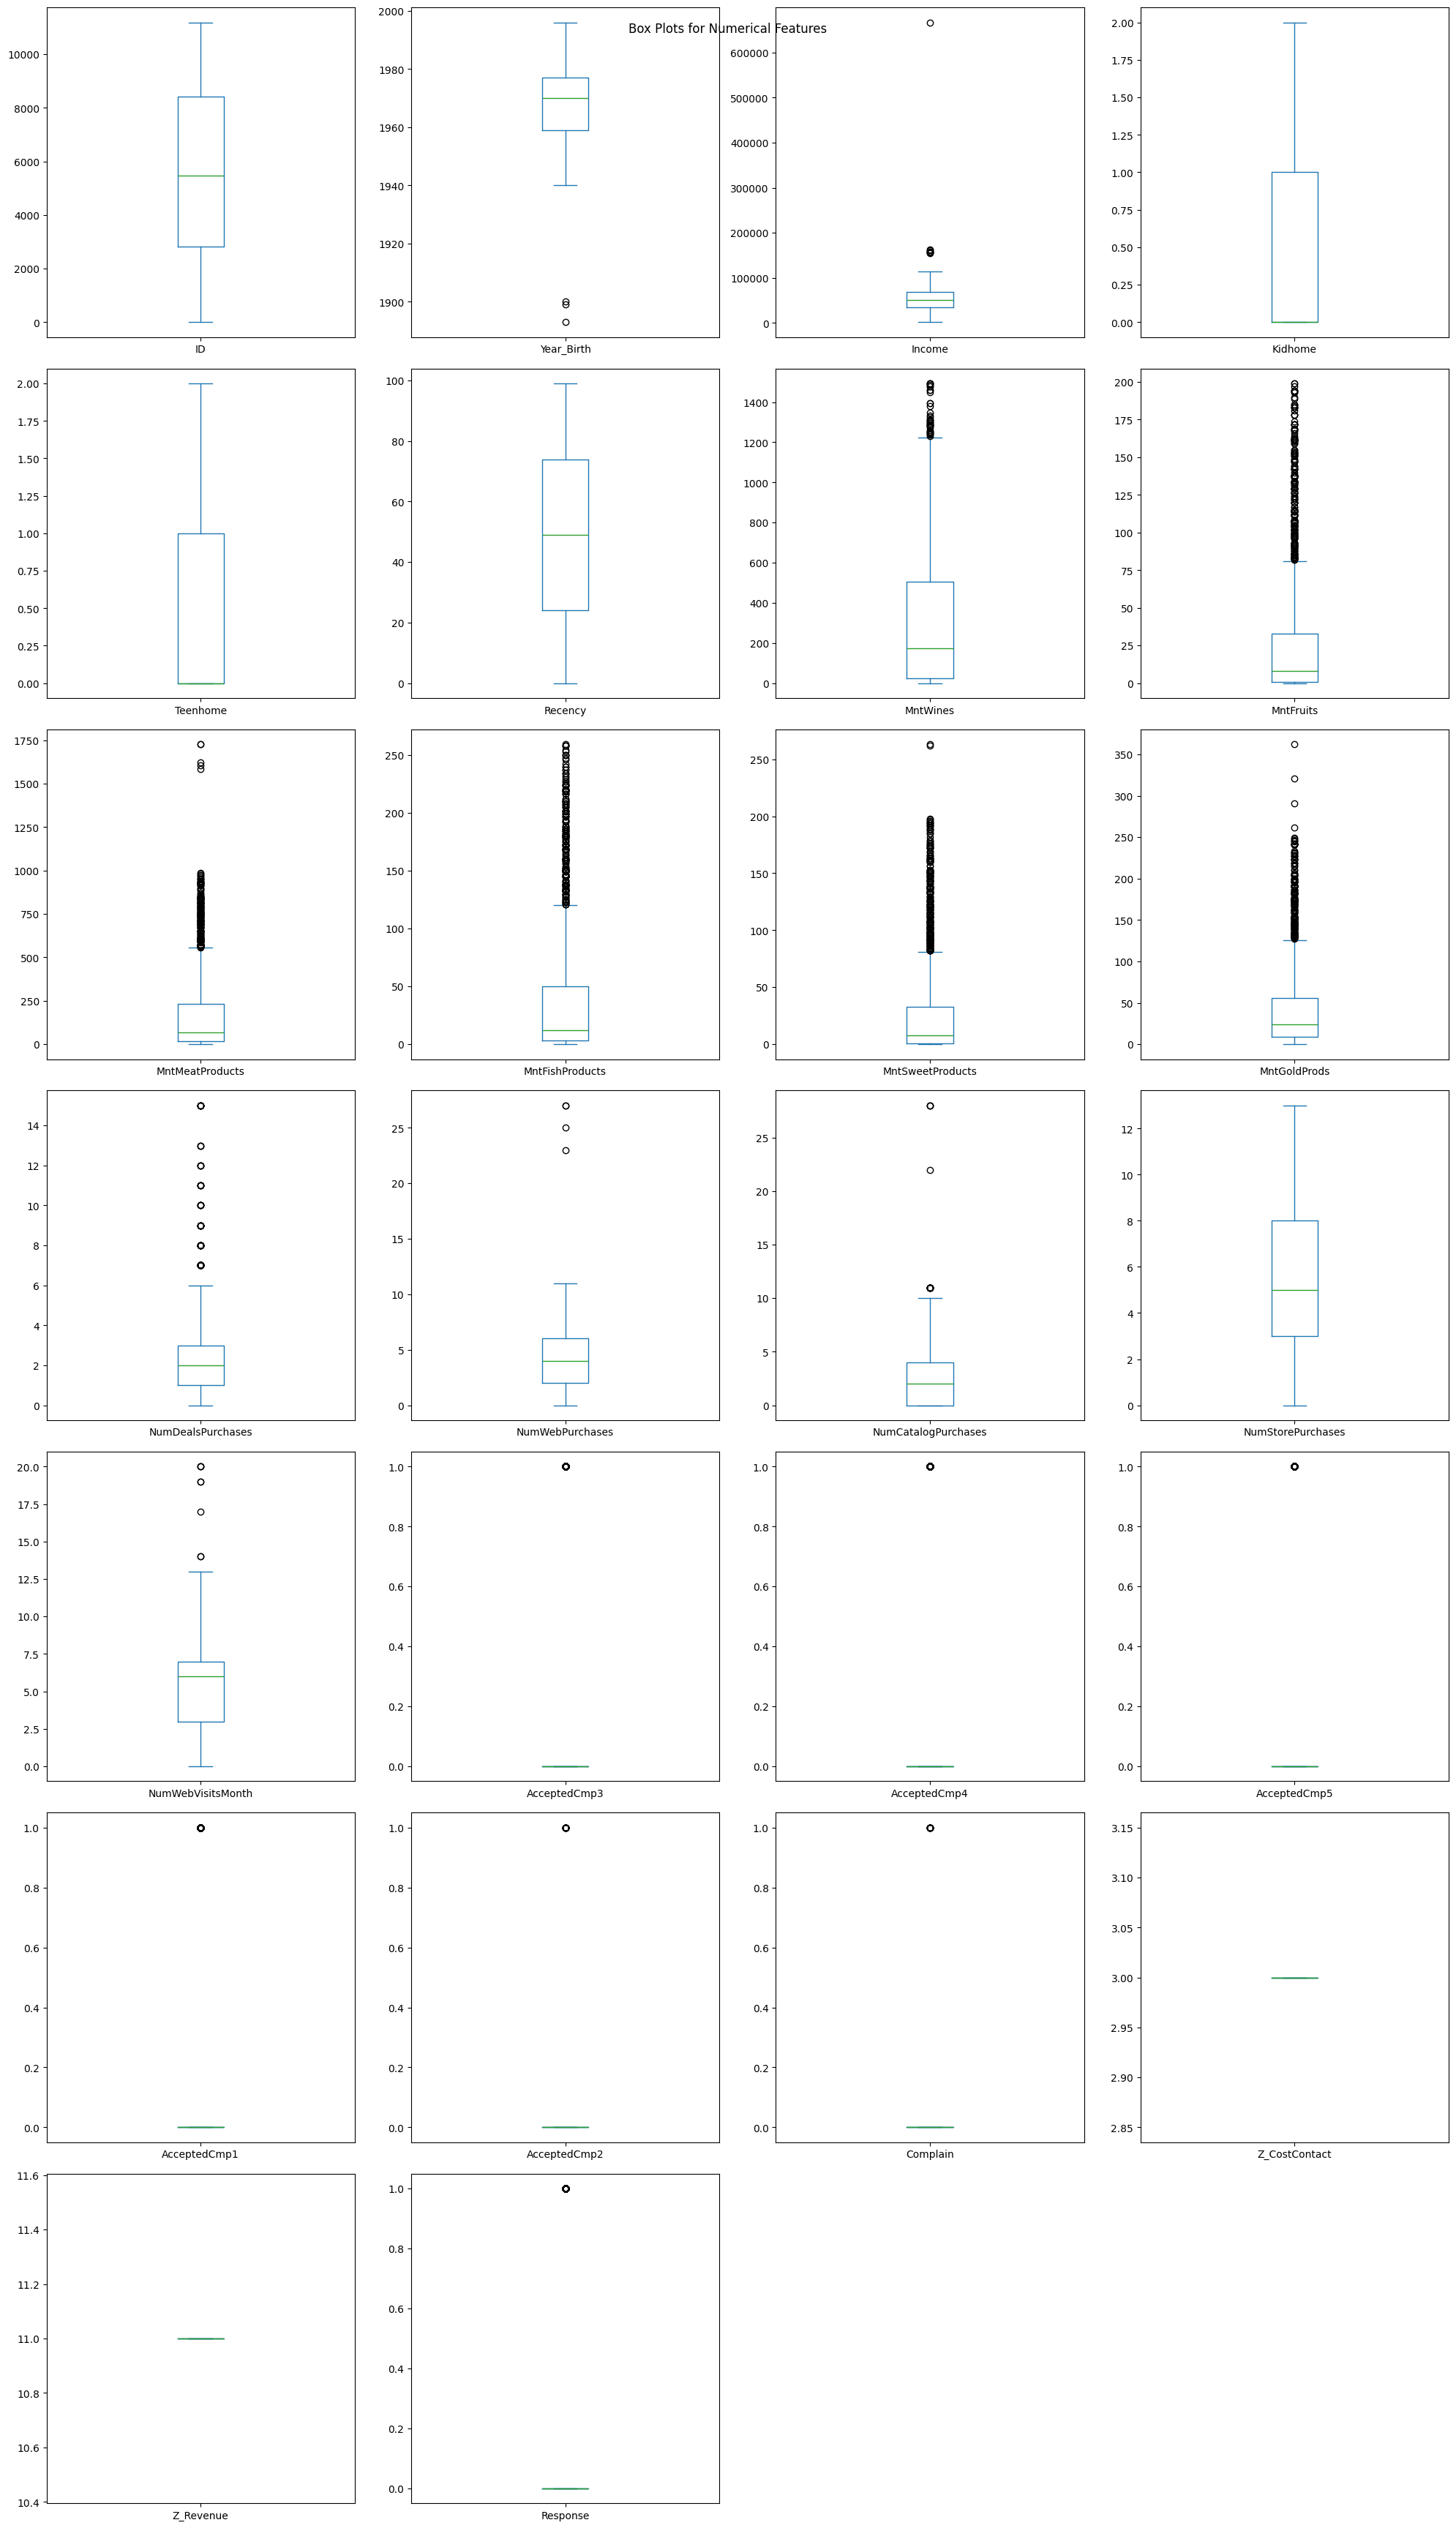

In [251]:
import math

# Number of numerical features
num_features = df.select_dtypes(include=['number']).shape[1]

# Calculate the grid size dynamically
ncols = 4  # Number of columns you want
nrows = math.ceil(num_features / ncols)

# Box plots for numerical features
df.select_dtypes(include=['number']).plot(
    kind='box',
    subplots=True,
    layout=(nrows, ncols),
    figsize=(20, nrows * 5),
    title="Box Plots for Numerical Features"
)
plt.tight_layout()
plt.show()

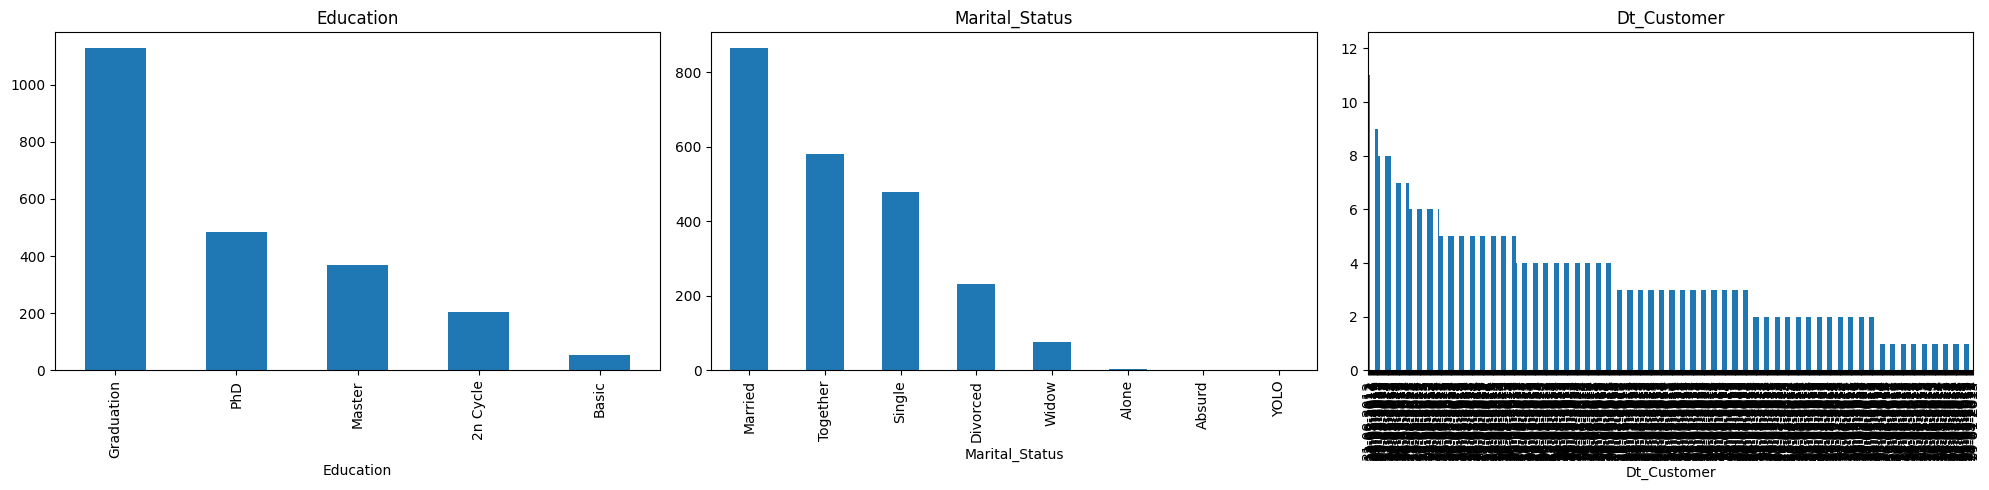

In [252]:
# Bar charts for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

ncols = 3  # Number of columns
nrows = math.ceil(len(categorical_features) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, column in enumerate(categorical_features):
    ax = axes[i]
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(column)

# Hide unused subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

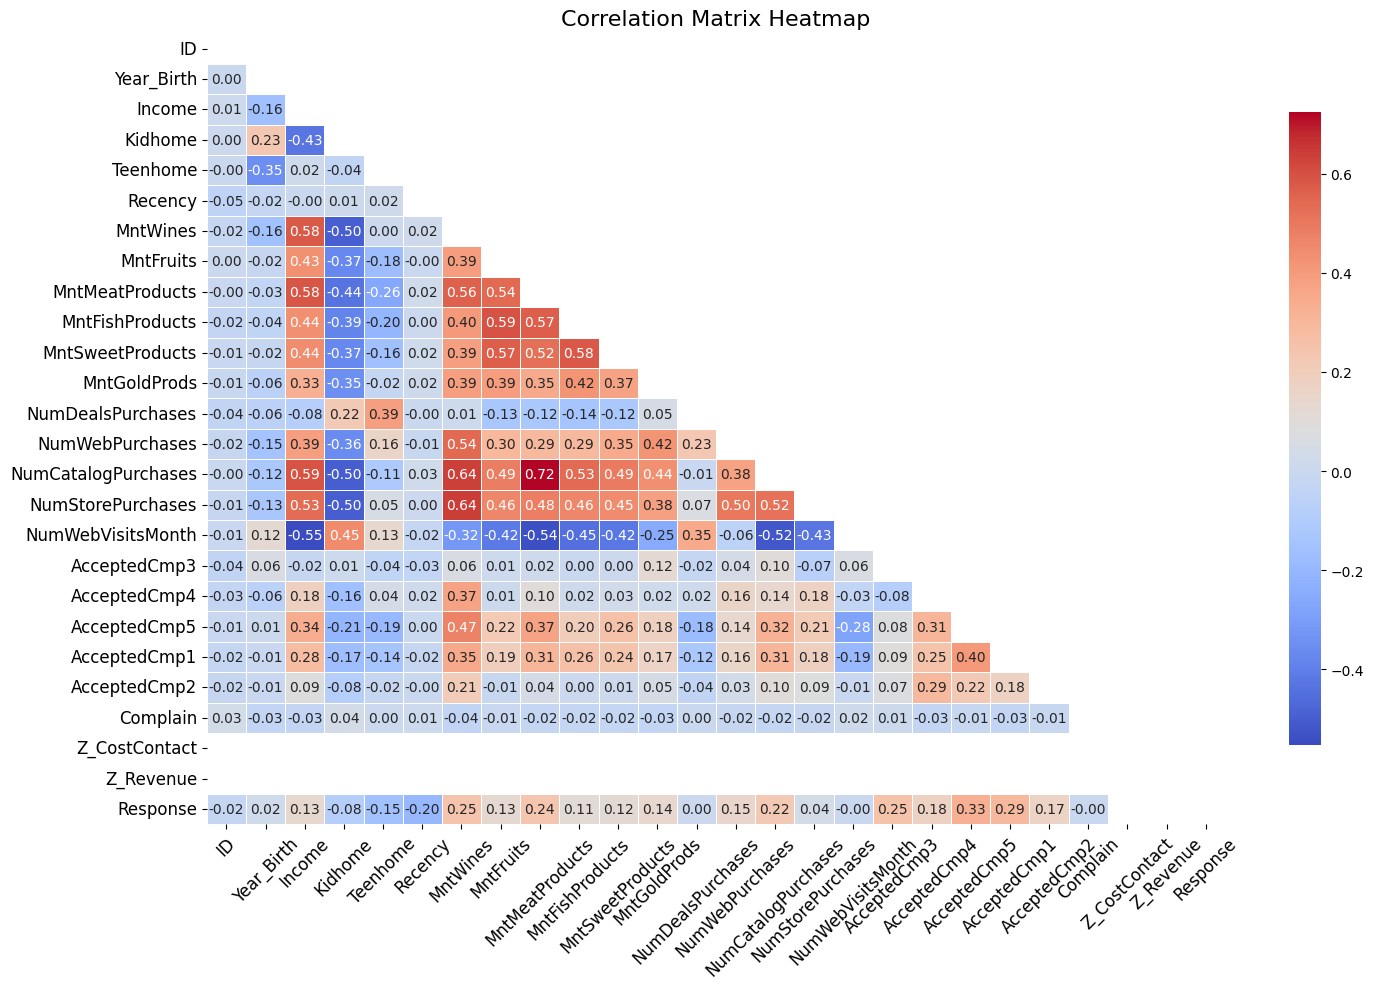

In [253]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a mask for the upper triangle (optional, for cleaner display)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Apply the mask
    annot=True,  # Show correlation values
    fmt=".2f",  # Format the numbers
    cmap='coolwarm',  # Color palette
    cbar_kws={'shrink': 0.8},  # Shrink the color bar
    linewidths=0.5  # Add grid lines between cells
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [254]:
# Fill missing values in the Income column with the median
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Check if all missing values have been filled
df['Income'].isnull().sum()

<ipython-input-254-46c5e9a54365>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [255]:
# Fill missing values in the Income column with the median
median_income = df['Income'].median()

# Updated approach without `inplace` to fill missing values
df['Income'] = df['Income'].fillna(median_income)

# Check if all missing values have been filled
missing_values_count = df['Income'].isnull().sum()
print(f"Missing values in 'Income' column after filling: {missing_values_count}")

Missing values in 'Income' column after filling: 0


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [256]:
df.select_dtypes(include = "object").columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [257]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# One-hot encoding for specific features
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], prefix=['Education', 'Marital_Status'])

# Label encoding for all remaining categorical features (excluding one-hot encoded)
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Ensure all boolean-like columns are converted to integers (0/1)
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Convert 'Dt_Customer' to datetime and extract features
df_encoded['Dt_Customer'] = pd.to_datetime(df_encoded['Dt_Customer'], dayfirst=True)
df_encoded['Year_Customer_Since'] = df_encoded['Dt_Customer'].dt.year
df_encoded['Month_Customer_Since'] = df_encoded['Dt_Customer'].dt.month
df_encoded['Customer_For'] = 2024 - df_encoded['Year_Customer_Since']  # Assuming the current year is 2024

# Drop the original 'Dt_Customer' column
df_encoded.drop('Dt_Customer', axis=1, inplace=True)

# Print results
print(df_encoded.head())


     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Alone  \
0              546              172  ...                     0   
1                6                2  ...                     0   
2              127              111  ...                     0   
3               20               10  ...                     0   
4              118               46  ...                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0             

In [258]:
from sklearn.preprocessing import StandardScaler

# Define the relevant features for clustering
features_for_clustering = ['Income', 'Recency', 'Total_Spent', 'Total_Purchases', 'Age', 'NumWebVisitsMonth']

# Ensure all selected features exist in the DataFrame
features_for_clustering = [col for col in features_for_clustering if col in df.columns]
if not features_for_clustering:
    raise ValueError("No matching features found in the DataFrame for clustering.")

# Handle missing values in the selected features
df[features_for_clustering] = df[features_for_clustering].fillna(df[features_for_clustering].median())

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# Convert scaled features back to a DataFrame for interpretability
scaled_df = pd.DataFrame(scaled_features, columns=features_for_clustering)

# Print the scaled DataFrame for verification
print(scaled_df.head())


     Income   Recency  NumWebVisitsMonth
0  0.235696  0.307039           0.693904
1 -0.235454 -0.383664          -0.130463
2  0.773999 -0.798086          -0.542647
3 -1.022355 -0.798086           0.281720
4  0.241888  1.550305          -0.130463


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [259]:
# Select numerical columns for clustering
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
X = df_encoded[numerical_columns].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # 'auto' ensures optimal KMeans defaults
kmeans.fit(X_scaled)

# Assign cluster labels
df_encoded['Cluster'] = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for KMeans clustering: {silhouette_avg:.4f}")

# Check cluster assignments
print("Cluster assignments:")
print(df_encoded['Cluster'].value_counts())

# (Optional) Visualize the cluster centers if needed
print("Cluster centers (scaled):")
print(kmeans.cluster_centers_)

Silhouette Score for KMeans clustering: 0.0889
Cluster assignments:
Cluster
1    1239
2     847
0     154
Name: count, dtype: int64
Cluster centers (scaled):
[[-2.12885743e-02  3.86912810e-01 -5.11583575e-01  3.44940224e-01
  -8.30449205e-02  4.04008252e-02 -6.13515712e-01 -2.53855223e-01
  -4.62624064e-01 -1.79279691e-01 -2.74505161e-01 -2.06594917e-01
   5.36137793e-02 -4.13865249e-01 -5.39834389e-01 -4.50891833e-01
   2.95102718e-01 -8.01516800e-02 -1.60224227e-01 -2.80140277e-01
  -2.35635336e-01 -1.16510346e-01  1.04862055e-01  0.00000000e+00
   0.00000000e+00 -2.36309611e-01  3.16772517e+00 -1.57170777e-01
  -1.00626965e+00 -4.44815650e-01 -5.26384800e-01 -2.98940638e-02
  -3.66207838e-02 -2.02453391e-02  6.13647601e-02 -9.49514487e-02
   7.59719242e-02 -8.17522580e-02 -2.98940638e-02]
 [-1.39475319e-02  5.77037665e-02 -4.93403361e-01  4.43288282e-01
   1.30099413e-01 -1.59300972e-02 -5.55399344e-01 -5.00534298e-01
  -5.64219106e-01 -5.15899620e-01 -4.96801235e-01 -3.98308477e-01

In [260]:
from sklearn.metrics import silhouette_score

best_n_clusters = None
best_silhouette = -1

for n_clusters in range(2, 10):  # Test for clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"n_clusters={n_clusters}, Silhouette Score={score:.4f}")
    if score > best_silhouette:
        best_silhouette = score
        best_n_clusters = n_clusters

print(f"Best Number of Clusters: {best_n_clusters}, Best Silhouette Score: {best_silhouette:.4f}")


n_clusters=2, Silhouette Score=0.0778
n_clusters=3, Silhouette Score=0.0889
n_clusters=4, Silhouette Score=0.0893
n_clusters=5, Silhouette Score=0.0956
n_clusters=6, Silhouette Score=0.1023
n_clusters=7, Silhouette Score=0.0692
n_clusters=8, Silhouette Score=0.0722
n_clusters=9, Silhouette Score=0.0735
Best Number of Clusters: 6, Best Silhouette Score: 0.1023


Explained Variance Ratio: [0.1771137  0.05953369]


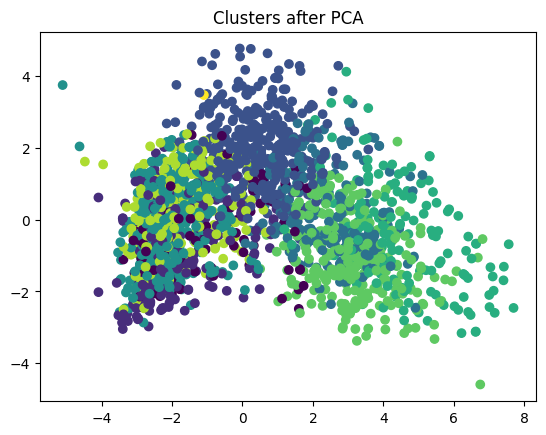

In [261]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters after PCA')
plt.show()

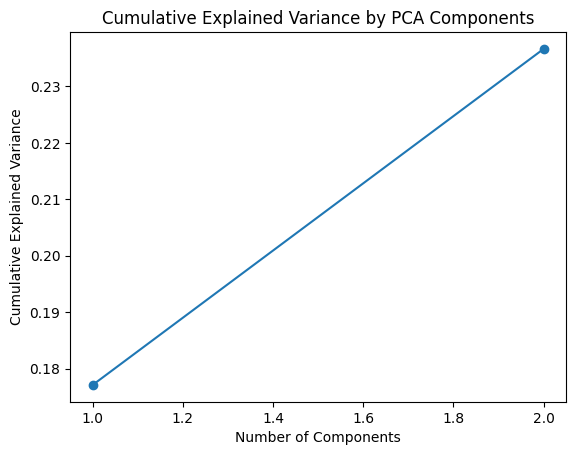

In [262]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Conclusions:**

Even though from my experience, scaling is almost always mandatory before clustering, but it didn't work well on this dataset.

Let's proceed with unscaled data.

In [263]:
# Select numerical features for clustering
X = df_encoded.select_dtypes(include=['int64', 'float64']).copy()

# Check results
X.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0


In [264]:
# Create KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42,  n_init='auto')
labels = kmeans.fit_predict(X)

In [265]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.4888204745136686

**Conclusion:**

The value of 0.4888 indicates that the clusters in your clustering are relatively well distributed, but there are still some overlaps or minor uncertainties between the clusters. This is an average result, which may be satisfactory depending on the specific task. However, it might be worth considering optimizing the number of clusters or revisiting the choice of features used for clustering.

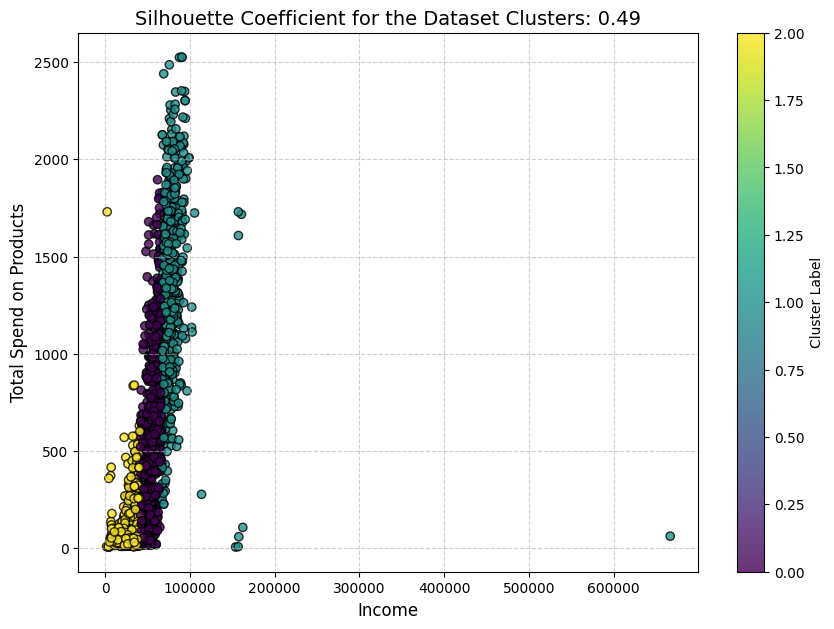

In [266]:
# Aggregating total spend columns
df['Total_Spend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                     df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Plot clusters with Income vs Total Spend
plt.figure(figsize=(10, 7))
plt.scatter(
    X['Income'],
    df['Total_Spend'],  # Using the newly aggregated column
    c=labels,  # Cluster labels
    cmap='viridis',  # Color map
    alpha=0.8,  # Transparency for better visualization
    edgecolors='k'  # Black edges for points
)
plt.title(f'Silhouette Coefficient for the Dataset Clusters: {silhouette_avg:.2f}', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Spend on Products', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for readability
plt.colorbar(label='Cluster Label')  # Add a color bar to indicate clusters
plt.show()


**Conclusion:**

Most customers have incomes up to 100,000 and spend 1,000-2,000 on products. Some high-income customers (over 200,000) spend significantly more. Clusters overlap, indicating that customers with different income levels can have similar product spending

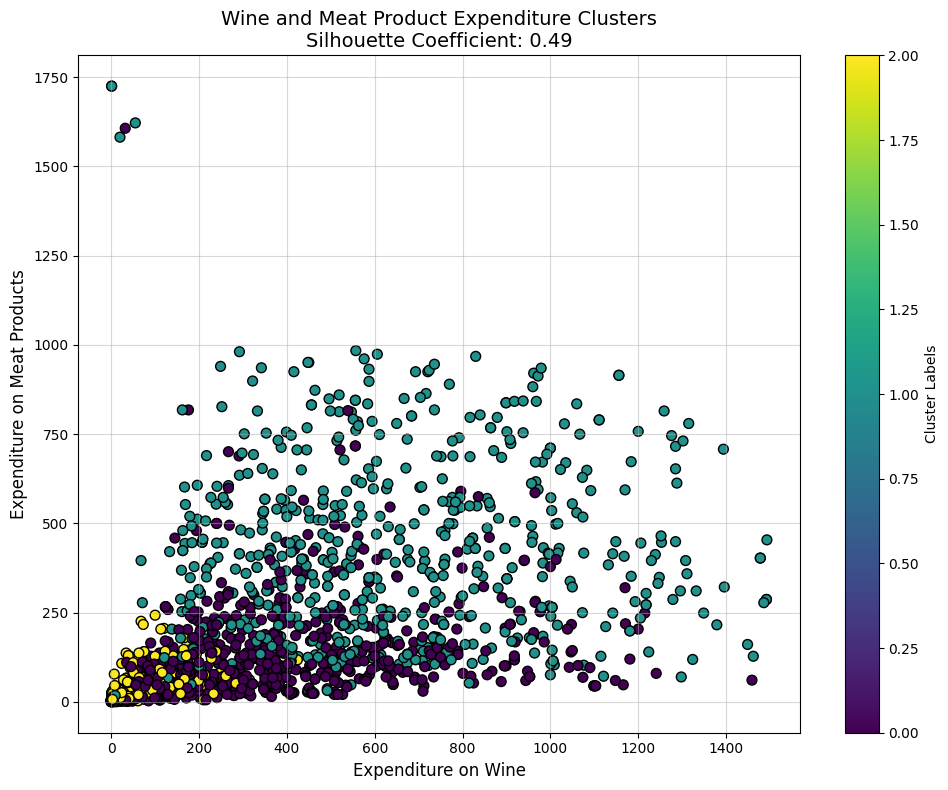

In [267]:
# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the scatter plot
scatter = plt.scatter(
    X['MntWines'],
    X['MntMeatProducts'],
    c=labels,
    cmap='viridis',
    edgecolor='k',
    s=50  # Adjust the size of points for better visibility
)

# Add a title with the Silhouette Coefficient for context
plt.title(
    f'Wine and Meat Product Expenditure Clusters\nSilhouette Coefficient: {silhouette_avg:.2f}',
    fontsize=14
)

# Label the axes
plt.xlabel('Expenditure on Wine', fontsize=12)
plt.ylabel('Expenditure on Meat Products', fontsize=12)

# Add a color bar to indicate the cluster assignments
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

# Optional: Add a grid for easier interpretation
plt.grid(alpha=0.5)

# Ensure the layout fits well within the figure
plt.tight_layout()

# Display the plot
plt.show()


**Conclusion:**

High dissemination indicates non-significance of these features for clustering.

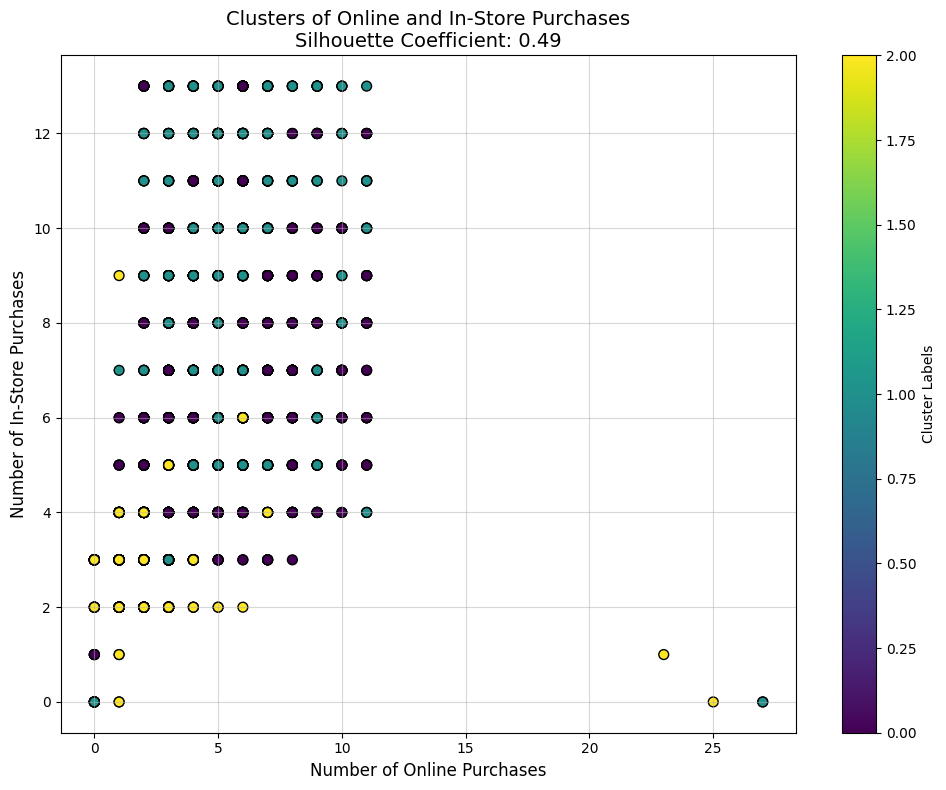

In [268]:
# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the scatter plot
scatter = plt.scatter(
    X['NumWebPurchases'],
    X['NumStorePurchases'],
    c=labels,
    cmap='viridis',
    edgecolor='k',
    s=50  # Adjust the size of points for better visibility
)

# Add a title with the Silhouette Coefficient for context
plt.title(
    f'Clusters of Online and In-Store Purchases\nSilhouette Coefficient: {silhouette_avg:.2f}',
    fontsize=14
)

# Label the axes
plt.xlabel('Number of Online Purchases', fontsize=12)
plt.ylabel('Number of In-Store Purchases', fontsize=12)

# Add a color bar to indicate the cluster assignments
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

# Optional: Add a grid for easier interpretation
plt.grid(alpha=0.5)

# Ensure the layout fits well within the figure
plt.tight_layout()

# Display the plot
plt.show()


**Conclusion:**

Most customers make relatively few purchases through the website (up to 10) and more in-store (up to 12). There's a clear grouping, but a few customers make significantly more online purchases, potentially representing a separate category of customers.

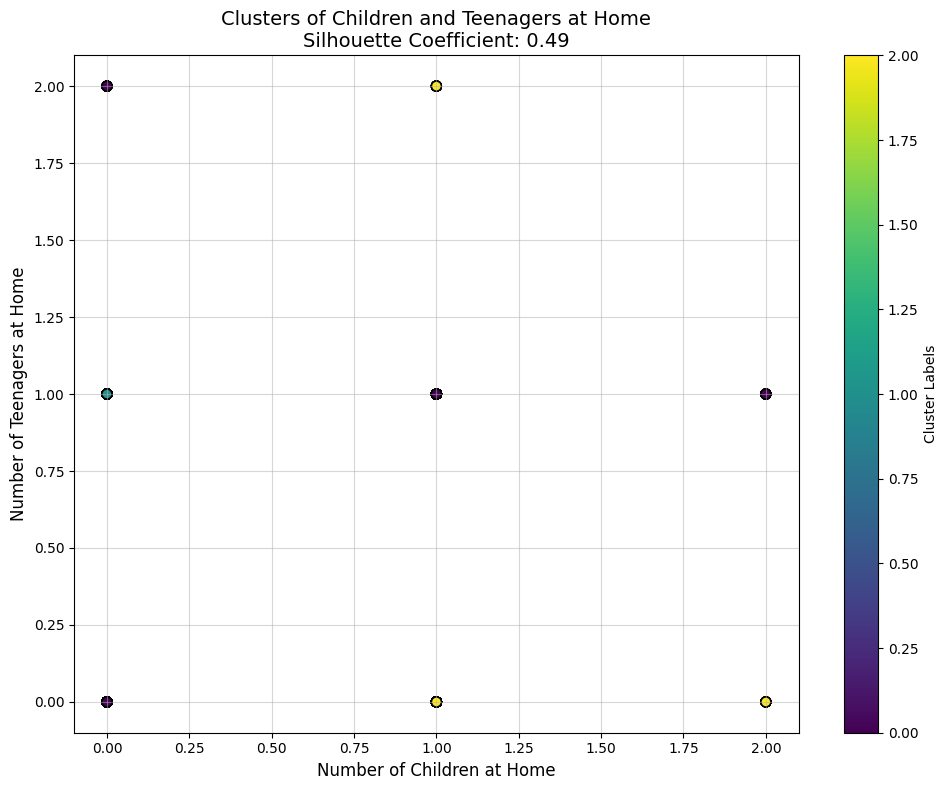

In [269]:
# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the scatter plot
scatter = plt.scatter(
    X['Kidhome'],
    X['Teenhome'],
    c=labels,
    cmap='viridis',
    edgecolor='k',
    s=50  # Adjust the size of points for better visibility
)

# Add a title with the Silhouette Coefficient for context
plt.title(
    f'Clusters of Children and Teenagers at Home\nSilhouette Coefficient: {silhouette_avg:.2f}',
    fontsize=14
)

# Label the axes
plt.xlabel('Number of Children at Home', fontsize=12)
plt.ylabel('Number of Teenagers at Home', fontsize=12)

# Add a color bar to indicate the cluster assignments
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

# Optional: Add a grid for easier interpretation
plt.grid(alpha=0.5)

# Ensure the layout fits well within the figure
plt.tight_layout()

# Display the plot
plt.show()

**Conclusion:**

The number of children and teenagers at home shows a clear distinction between clusters, suggesting a significant impact of these factors on customer behavior. The clusters appear well-separated, indicating that this feature is important for clustering.

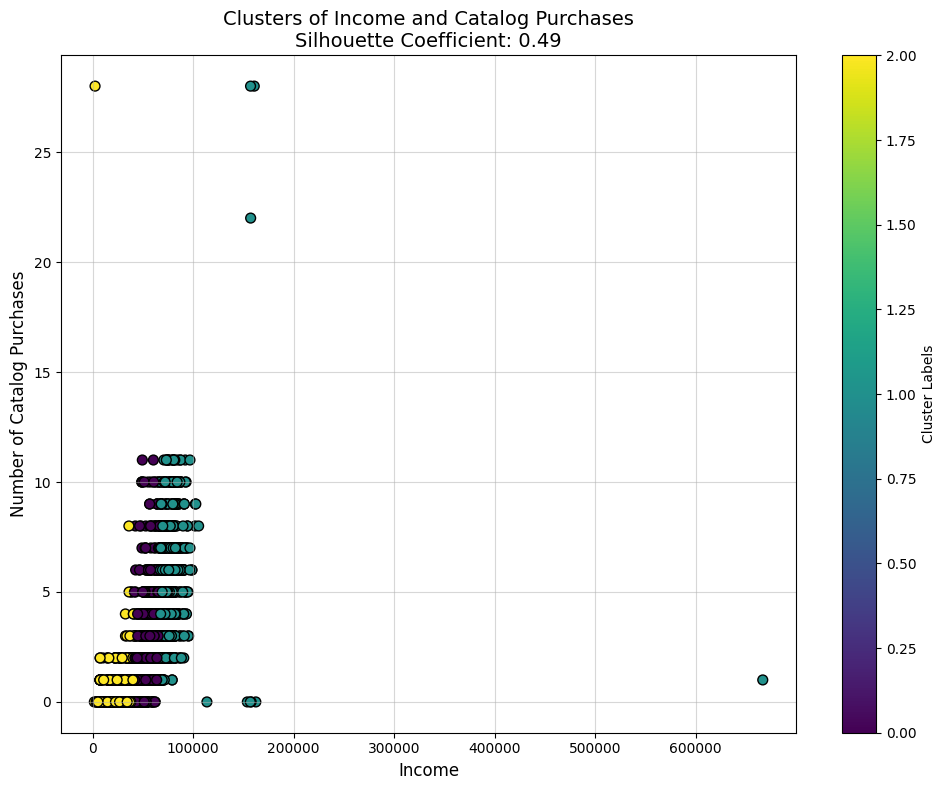

In [270]:
# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the scatter plot
scatter = plt.scatter(
    X['Income'],
    X['NumCatalogPurchases'],
    c=labels,
    cmap='viridis',
    edgecolor='k',
    s=50  # Adjust point size for better visibility
)

# Add a descriptive title with the Silhouette Coefficient
plt.title(
    f'Clusters of Income and Catalog Purchases\nSilhouette Coefficient: {silhouette_avg:.2f}',
    fontsize=14
)

# Label the axes
plt.xlabel('Income', fontsize=12)
plt.ylabel('Number of Catalog Purchases', fontsize=12)

# Add a color bar to indicate cluster assignments
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

# Add a grid for improved readability
plt.grid(alpha=0.5)

# Ensure layout fits within the figure
plt.tight_layout()

# Display the plot
plt.show()

**Conclusion:**

Customers with low incomes are more likely to shop through catalogs, although there are also some high-income customers who actively use catalogs. There is some cluster overlap, particularly among middle-income customers.

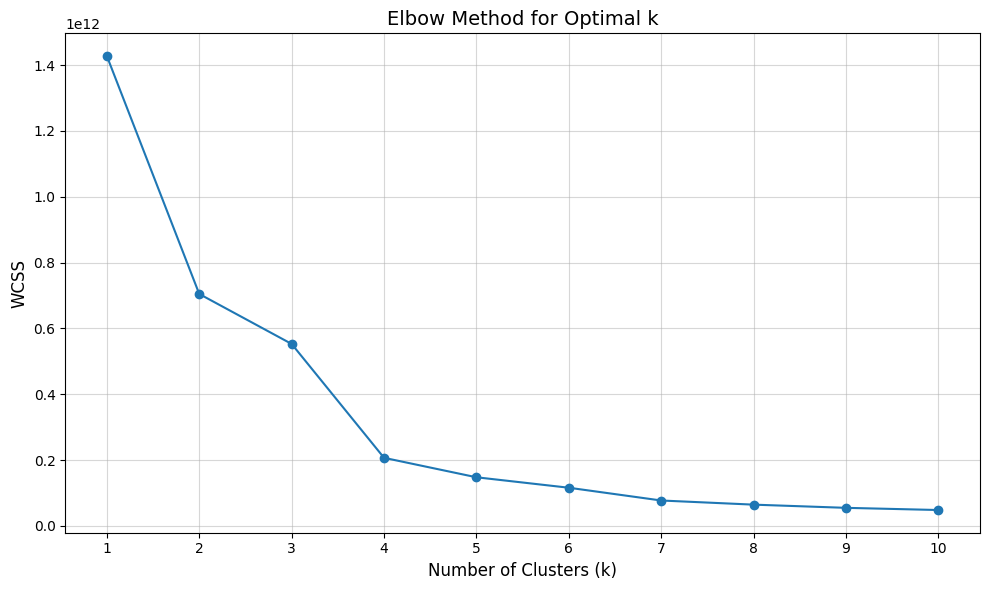

In [271]:
# Let's check the optimal number of clusters with the Elbow Method
wcss = []

# Calculate WCSS for k = 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [272]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f'k: {k}, Silhouette Score: {score}')


k: 2, Silhouette Score: 0.5654551820847079
k: 3, Silhouette Score: 0.4888204745136686
k: 4, Silhouette Score: 0.49323386611629544
k: 5, Silhouette Score: 0.45400545736454573
k: 6, Silhouette Score: 0.4326780869163929
k: 7, Silhouette Score: 0.44295327228270126
k: 8, Silhouette Score: 0.40036855853661807
k: 9, Silhouette Score: 0.37514638812837076
k: 10, Silhouette Score: 0.36131682602972776


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [273]:
df_encoded['Total_Spend'] = df_encoded[['MntWines', 'MntFruits', 'MntMeatProducts',
                                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [274]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(
    df_encoded,
    x='Income',
    y='Recency',
    z='Total_Spend',
    color='Marital_Status_Married',
    title="3D Visualization of Clusters",
    labels={
        'Income': 'Income',
        'Recency': 'Days Since Last Purchase',
        'Total_Spend': 'Total Spend on Products',
    }
)

# Update axis ranges and layout
fig.update_layout(scene=dict(
    xaxis=dict(title='Income'),
    yaxis=dict(title='Days Since Last Purchase'),
    zaxis=dict(title='Total Spend')
))

# Display the 3D plot
fig.show()


**Observations:**

**Cluster Distribution:**

The color gradient (from purple to yellow) represents the marital status (Marital_Status_Married), where 1 is married and 0 is not married.
Both married and unmarried individuals are scattered across the plot, with no clear segregation, suggesting that marital status does not strongly influence income, recency, or total spending in a highly distinct way.

**Patterns in Spending:**

Individuals with higher incomes tend to have higher total spending (Total Spend), which aligns with expectations.
Discounted purchases may not be directly visible in this plot, but further analysis could explore how recency and income interact with spending behaviors.

**Density:**

A majority of the points are concentrated in the middle ranges of income and spending, with fewer individuals in the extremes (high income and spending).

In [275]:
# Add total spending on products to the DataFrame
df_encoded['Total_Spend'] = df_encoded[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Create a 3D plot
fig = px.scatter_3d(
    df_encoded,
    x='Income',  # Income
    y='Total_Spend',  # Total spending on products
    z='NumDealsPurchases',  # Number of purchases with discounts
    color='Marital_Status_Married',  # Color based on marital status (married)
    title='3D Visualization of Clusters'
)

# Display the plot
fig.show()

**Observations:**

**Color Gradient (Marital Status):**

Married and non-married individuals are distributed across similar income and spending ranges, indicating that marital status does not appear to be a primary driver of these behaviors.

**Tendencies:**

Higher income levels generally correspond to higher total spending, as expected.

Discounted purchases are relatively consistent across different income and spending levels, indicating that discounts appeal to a broad audience regardless of income.

The majority of data points cluster in the middle range of income, spending, and discount purchases, suggesting a dominant consumer group with moderate income and spending habits.

**Patterns in Discounted Purchases:**

A few individuals with high incomes and spending also have high numbers of discounted purchases, which might indicate savvy shopping behavior among wealthier individuals.

Conversely, low-income groups are more likely to cluster around lower spending and fewer discounted purchases.

In [276]:
# Create a 3D plot for the new features
fig = px.scatter_3d(
    df_encoded,
    x='NumWebPurchases',  # Number of purchases through the website
    y='NumStorePurchases',  # Number of purchases in-store
    z='NumCatalogPurchases',  # Number of purchases through the catalog
    color=labels,  # Use the previously obtained clusters
    title="3D Visualization of Clusters",
    labels={
        'NumWebPurchases': 'Purchases through Website',
        'NumStorePurchases': 'Purchases in Store',
        'NumCatalogPurchases': 'Purchases through Catalog'
    }
)

# Display the plot
fig.show()

**Observations:**

There is some distinction between clusters (e.g., clusters appear more prominent in certain regions), but overlap is significant, especially in areas with dense data.

**Patterns Observed:**

Most customers make fewer purchases through catalogs compared to websites and stores, as seen by the smaller z-values.

Individuals making a high number of purchases via catalogs tend to make fewer purchases in stores, indicating potentially different shopping preferences or behaviors.

The dense clustering at lower ranges across all axes suggests that the majority of customers make moderate or low numbers of purchases in all channels.

**Outliers:**

A few customers have high values for purchases in all three categories, standing apart from the dense central cluster.

These high-value points may represent high-value customers or unique shopping behaviors worth analyzing further.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [277]:
# I did these steps before in this notebook, but for the safety of evaluation here is the repeated code:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

silhouette_scaled = silhouette_score(X_scaled, labels_scaled)

print(f'Before scaling: {silhouette_avg:.3f}')
print(f'After scaling: {silhouette_scaled:.3f}')

Before scaling: 0.489
After scaling: 0.089


**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [278]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Delete 'Income' and 'Total_Spend' outliers
df_no_outliers = remove_outliers(df_encoded, 'Income')
df_no_outliers = remove_outliers(df_no_outliers, 'Total_Spend')

# Check new DataFrame
print(f"Shape before deleting outliers: {df_encoded.shape}")
print(f"Shape after deleting outliers: {df_no_outliers.shape}")

Shape before deleting outliers: (2240, 44)
Shape after deleting outliers: (2229, 44)


In [279]:
# Create new DataFrame without outliers
X_no_outliers = df_no_outliers.select_dtypes(include=['int64', 'float64'])
kmeans_no_outliers = KMeans(n_clusters=3, random_state=42,  n_init='auto')
labels_no_outliers = kmeans_no_outliers.fit_predict(X_no_outliers)

# Calculate Silhouette score
silhouette_no_outliers = silhouette_score(X_no_outliers, labels_no_outliers)
print(f"Silhouette score after deleting outliers: {silhouette_no_outliers:.3f}")

Silhouette score after deleting outliers: 0.499


**Conclusion:**

Deletion of outliers boosted silhouette score from 0.488 to 0.499.

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

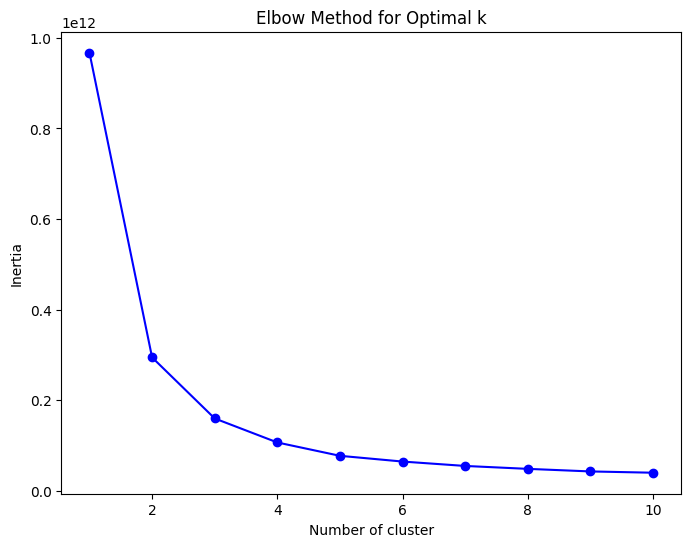

In [291]:
# I did this before in this exact notebook, but let's repeat for safety of evaluation

range_n_clusters = list(range(1, 11))
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_no_outliers)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertias, 'bo-')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


**Conclusion:**

Without outliers, the optimal number of clusters, according to Elbow Method, is between 3 and 4.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

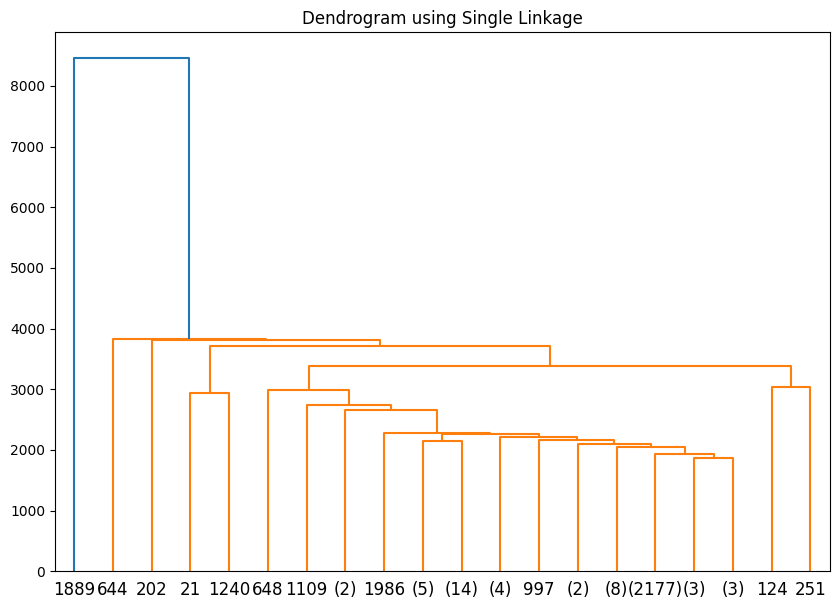

In [281]:
linked = linkage(X_no_outliers, method='single')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20)  # truncate_mode='lastp' for cutting dendrogram
plt.title('Dendrogram using Single Linkage')
plt.show()

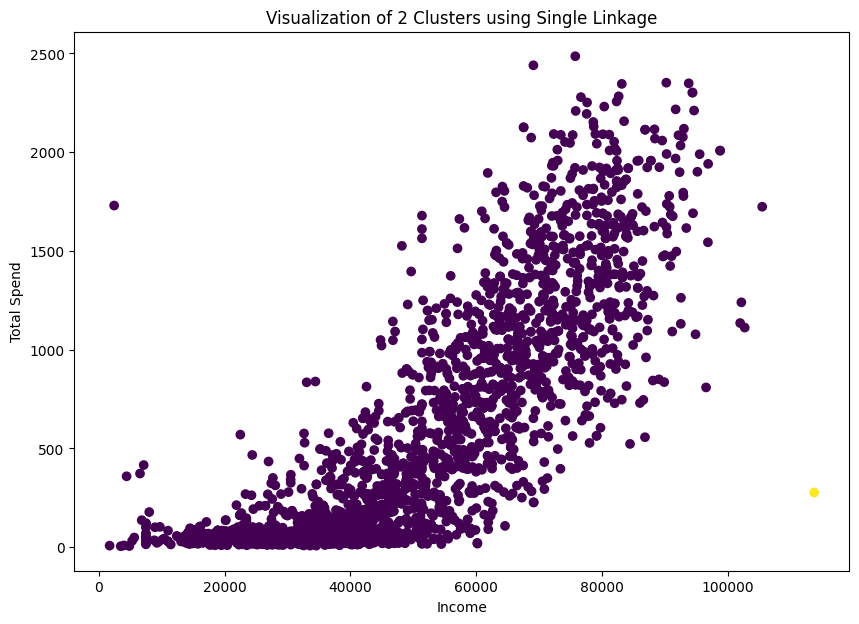

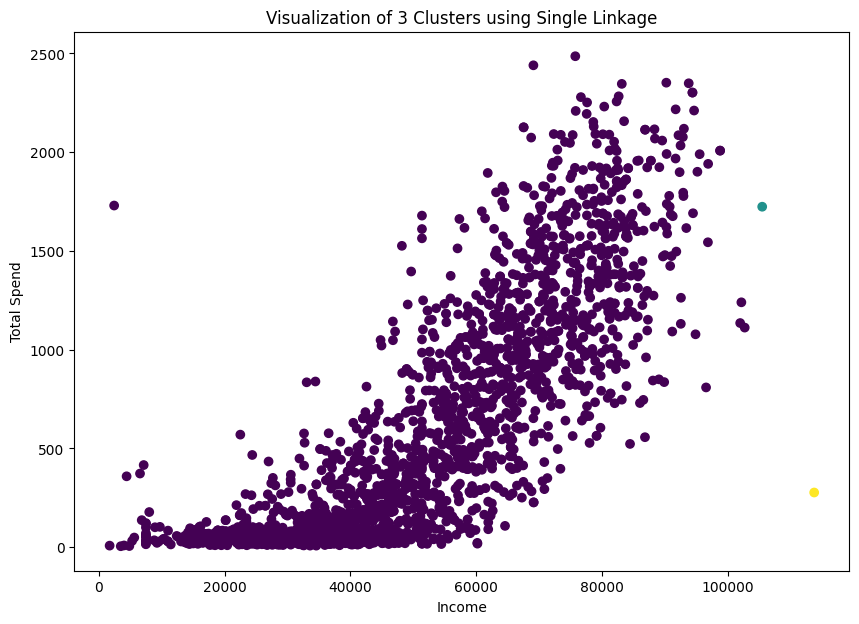

Silhouette Score for 2 Clusters: 0.546
Silhouette Score for 3 Clusters: 0.464


In [292]:
# Option with 2 clusters
labels_2_clusters = fcluster(linked, 2, criterion='maxclust')

# Option with 3 clusters
labels_3_clusters = fcluster(linked, 3, criterion='maxclust')

# Visualization of clusterings with 2 clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_no_outliers['Income'], X_no_outliers['Total_Spend'], c=labels_2_clusters, cmap='viridis')
plt.title('Visualization of 2 Clusters using Single Linkage')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

# Visualization of clusterings with 3 clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_no_outliers['Income'], X_no_outliers['Total_Spend'], c=labels_3_clusters, cmap='viridis')
plt.title('Visualization of 3 Clusters using Single Linkage')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

# Compute silhouette score for 2 clusters
silhouette_2_clusters = silhouette_score(X_no_outliers, labels_2_clusters)
print(f"Silhouette Score for 2 Clusters: {silhouette_2_clusters:.3f}")

# Compute silhouette score for 3 clusters
silhouette_3_clusters = silhouette_score(X_no_outliers, labels_3_clusters)
print(f"Silhouette Score for 3 Clusters: {silhouette_3_clusters:.3f}")

**Observations:**

**Silhouette metrics for 2 and 3 clusters:**

Silhouette for 2 clusters: 0.546. This is a fairly good value, indicating that the clusters are clearly separated. A higher silhouette score means that points within each cluster are closer to each other and well-separated from other clusters.

Silhouette for 3 clusters: 0.464. This is also a decent value but slightly lower than for 2 clusters. This might mean that adding a third cluster has made the distribution less clear, or that this cluster contains points that are less well-grouped.

**Conclusion:**

2 Clusters: Best for clear cluster separation.

3 Clusters: Useful for more detailed data division, though with some loss in clarity.


**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [283]:
# Configure and perform clustering using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_clustering.fit_predict(X_no_outliers)

# Compute the silhouette score
silhouette_agg = silhouette_score(X_no_outliers, labels_agg)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agg:.3f}")

# Visualize the clusters in 3D
fig = px.scatter_3d(
    X_no_outliers,
    x='Income',
    y='Total_Spend',
    z='NumDealsPurchases',
    color=labels_agg,
    title="3D Visualization of Agglomerative Clustering"
)
fig.show()

Silhouette Score for Agglomerative Clustering: 0.482


**Observations:**

1. The average silhouette score of 0.482 suggests that the clustering quality is reasonably good, though not perfect.
2. The 3D visualization reveals several clusters, although they are not distinctly separated, hinting at overlapping segments or data noise.
3. Some points appear to be potential outliers, particularly those far removed from the main data group.

**Conclusion:**

Agglomerative clustering has provided a clearer model, identifying potential customer groups, despite the result not being ideal.

Silhouette Score cannot be computed due to insufficient clusters.


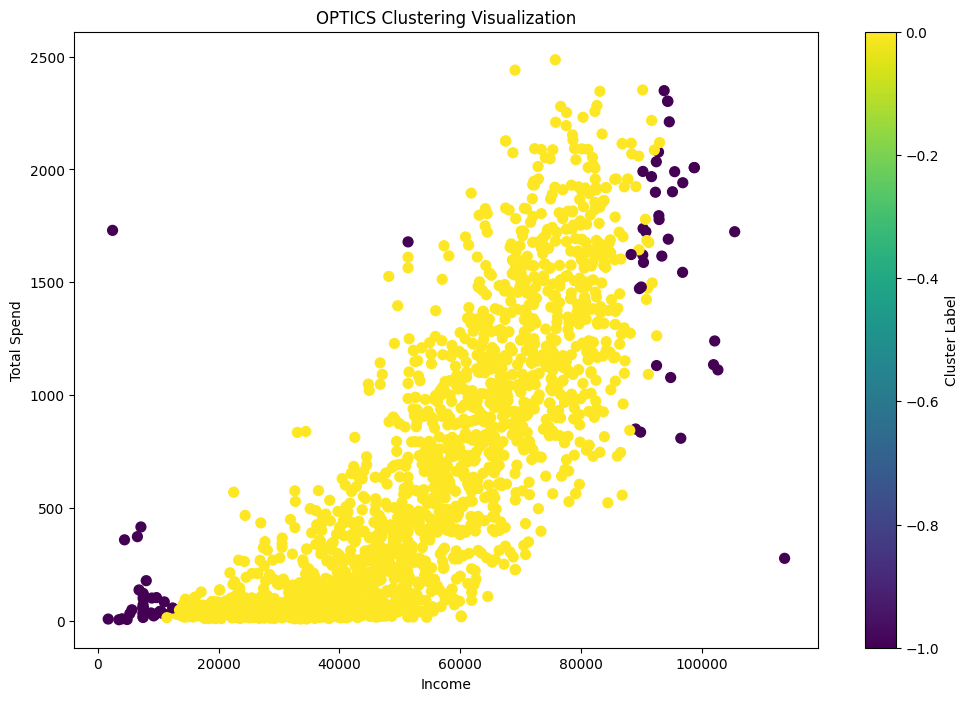

Cluster label distribution:
 0    2157
-1      72
Name: count, dtype: int64


In [284]:
from sklearn.cluster import OPTICS

# Initialize OPTICS clustering
optics_model = OPTICS(min_samples=5, metric='euclidean', xi=0.05, min_cluster_size=0.1)

# Fit the model and predict cluster labels
labels_optics = optics_model.fit_predict(X_no_outliers)

# Add cluster labels back to the DataFrame
X_no_outliers['OPTICS_Cluster'] = labels_optics

# Compute Silhouette Score (only for valid clusters, exclude noise points with label -1)
valid_labels = labels_optics[labels_optics != -1]
if len(np.unique(valid_labels)) > 1:  # Silhouette score requires at least 2 clusters
    silhouette_optics = silhouette_score(X_no_outliers[labels_optics != -1], valid_labels)
    print(f"Silhouette Score for OPTICS Clustering: {silhouette_optics:.3f}")
else:
    print("Silhouette Score cannot be computed due to insufficient clusters.")

# Visualize the clusters in 2D (choose two columns for visualization, e.g., 'Income' and 'Total_Spend')
plt.figure(figsize=(12, 8))
plt.scatter(X_no_outliers['Income'], X_no_outliers['Total_Spend'], c=labels_optics, cmap='viridis', s=50)
plt.title('OPTICS Clustering Visualization')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.colorbar(label='Cluster Label')
plt.show()

# Optional: Check cluster label distribution
print("Cluster label distribution:")
print(pd.Series(labels_optics).value_counts())


Unique cluster labels: [-1  0]
Silhouette Score cannot be computed due to insufficient clusters.


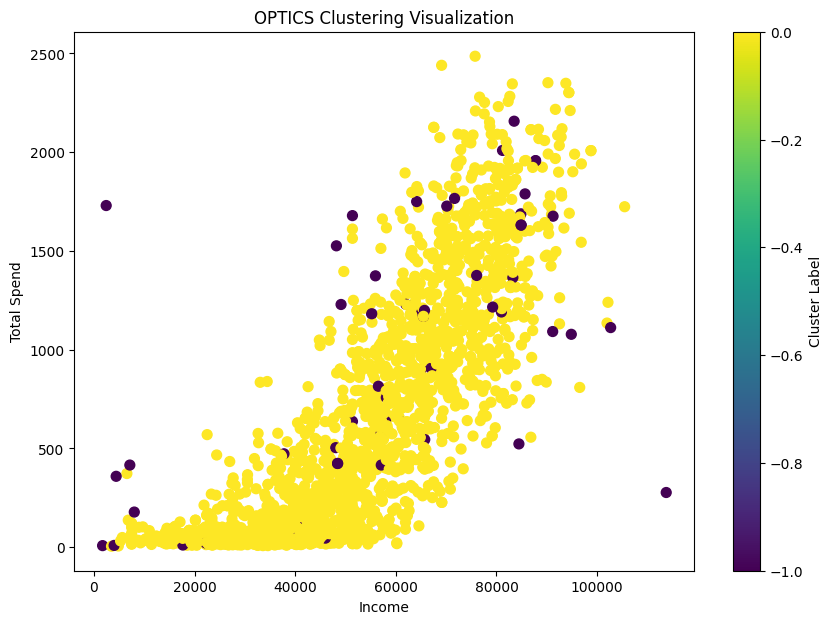

Cluster label distribution:
 0    2161
-1      68
Name: count, dtype: int64


In [285]:
from sklearn.cluster import OPTICS
from sklearn.impute import SimpleImputer

# Handle missing values by imputing them with the column mean
imputer = SimpleImputer(strategy='mean')
X_no_outliers_imputed = pd.DataFrame(imputer.fit_transform(X_no_outliers), columns=X_no_outliers.columns)

# Scale the data to standardize feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers_imputed)

# Perform OPTICS clustering
optics_model = OPTICS(min_samples=5, metric='euclidean', xi=0.05, min_cluster_size=0.1)
labels_optics = optics_model.fit_predict(X_scaled)

# Add cluster labels back to the original DataFrame
X_no_outliers_imputed['OPTICS_Cluster'] = labels_optics

# Check for unique cluster labels
print("Unique cluster labels:", np.unique(labels_optics))

# Compute the silhouette score for valid clusters (excluding noise points)
valid_labels = labels_optics[labels_optics != -1]
if len(np.unique(valid_labels)) > 1:
    silhouette_optics = silhouette_score(X_scaled[labels_optics != -1], valid_labels)
    print(f"Silhouette Score for OPTICS Clustering: {silhouette_optics:.3f}")
else:
    print("Silhouette Score cannot be computed due to insufficient clusters.")

# Visualize the clusters in 2D
plt.figure(figsize=(10, 7))
plt.scatter(X_no_outliers_imputed['Income'], X_no_outliers_imputed['Total_Spend'],
            c=labels_optics, cmap='viridis', s=50)
plt.title('OPTICS Clustering Visualization')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.colorbar(label='Cluster Label')
plt.show()

# Optional: Display the cluster label distribution
print("Cluster label distribution:")
print(pd.Series(labels_optics).value_counts())


In [286]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42)
labels_kmedoids = kmedoids.fit_predict(X_no_outliers_imputed)


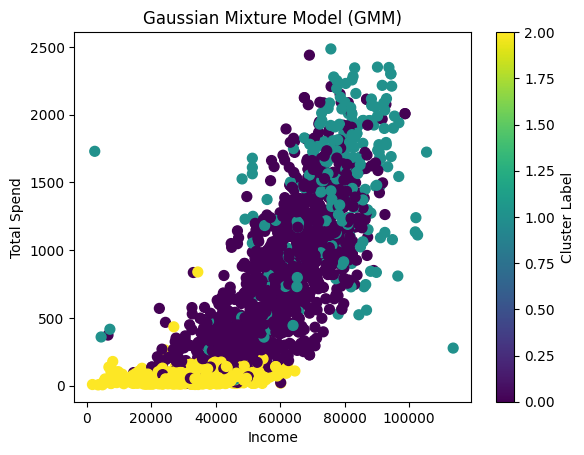

In [287]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_no_outliers_imputed)

# Visualization
plt.scatter(X_no_outliers_imputed['Income'], X_no_outliers_imputed['Total_Spend'],
            c=labels_gmm, cmap='viridis', s=50)
plt.title("Gaussian Mixture Model (GMM)")
plt.xlabel("Income")
plt.ylabel("Total Spend")
plt.colorbar(label="Cluster Label")
plt.show()


**Conclusion:**

As we can see from the graph, GMM produces significant overlap even on data with no outliers. Imputation does not help.

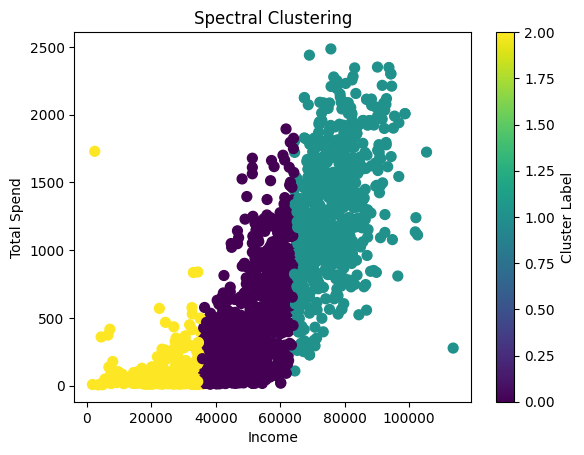

In [288]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(X_no_outliers_imputed)

# Visualization
plt.scatter(X_no_outliers_imputed['Income'], X_no_outliers_imputed['Total_Spend'],
            c=labels_spectral, cmap='viridis', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Income")
plt.ylabel("Total Spend")
plt.colorbar(label="Cluster Label")
plt.show()


**Conclusion:**

Visually, spectral clustering performs well on the imputed and scaled dataset without outliers, though the silhouette score may be low due to the challenging scaling of this specific dataset.

Spectral clustering requires redundancy in connections within the dataset and excels at identifying non-convex clusters in datasets with well-defined similarity metrics. However, it is computationally expensive for large datasets.

In [289]:
# Let's try additional methods on scaled and imputed dataset
# Scale the data (scaling is critical for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers_imputed)

# Initialize a dictionary to store silhouette scores
silhouette_scores = {}

# OPTICS
optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels_optics = optics_model.fit_predict(X_scaled)

# Exclude noise points (-1) for silhouette computation
valid_optics = labels_optics[labels_optics != -1]
if len(set(valid_optics)) > 1:  # Silhouette requires at least 2 clusters
    silhouette_scores['OPTICS'] = silhouette_score(X_scaled[labels_optics != -1], valid_optics)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_scores['GMM'] = silhouette_score(X_scaled, labels_gmm)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(X_scaled)
silhouette_scores['Spectral Clustering'] = silhouette_score(X_scaled, labels_spectral)

# K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
labels_kmedoids = kmedoids.fit_predict(X_scaled)
silhouette_scores['K-Medoids'] = silhouette_score(X_scaled, labels_kmedoids)

# Print all silhouette scores
for method, score in silhouette_scores.items():
    print(f"Silhouette Score for {method}: {score:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Silhouette Score for GMM: 0.159
Silhouette Score for Spectral Clustering: 0.174
Silhouette Score for K-Medoids: 0.021


In [290]:
# Same, but on initial dataset (without scaling and imputing)
# Initialize a dictionary to store silhouette scores
silhouette_scores = {}

# OPTICS
optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels_optics = optics_model.fit_predict(X)

# Exclude noise points (-1) for silhouette computation
valid_optics = labels_optics[labels_optics != -1]
if len(set(valid_optics)) > 1:  # Silhouette requires at least 2 clusters
    silhouette_scores['OPTICS'] = silhouette_score(X[labels_optics != -1], valid_optics)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X)
silhouette_scores['GMM'] = silhouette_score(X, labels_gmm)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(X)
silhouette_scores['Spectral Clustering'] = silhouette_score(X, labels_spectral)

# K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
labels_kmedoids = kmedoids.fit_predict(X)
silhouette_scores['K-Medoids'] = silhouette_score(X, labels_kmedoids)

# Print all silhouette scores
for method, score in silhouette_scores.items():
    print(f"Silhouette Score for {method}: {score:.3f}")

Silhouette Score for GMM: 0.248
Silhouette Score for Spectral Clustering: 0.476
Silhouette Score for K-Medoids: 0.481


**Observations:**

**Gaussian Mixture Model (GMM): 0.248**

The clustering is relatively poor, as the score is close to 0.

This could mean overlapping clusters, or the data doesn't follow a Gaussian distribution well.

GMM might not be the best choice for this dataset.

**Spectral Clustering: 0.476**

A moderate silhouette score, suggesting somewhat well-defined clusters.

Spectral clustering is better suited for non-convex clusters, so this result indicates it captures the structure better than GMM.

**K-Medoids: 0.481**

Slightly better than Spectral Clustering.
K-Medoids tends to perform better with non-Gaussian data and is robust to outliers, which may explain its higher score.

**Conclusions:**

K-Medoids has the highest silhouette score, suggesting it might be the best method for this data.

Spectral Clustering is a close second, so it’s worth analyzing the clusters visually to confirm if it provides meaningful segmentation.